#Understanding the Data

In [ ]:
# Importing necessary libraries for our dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing our dataset
accidents = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/US_Accidents_Dec21_updated.csv")
pd.set_option("max_column", None)

In [ ]:
accidents.shape

(2845342, 47)

from the above output, we can see that our dataset consists of 47 columns and 2.8 million rows 

In [ ]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
accidents.sample(5) 

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1894001,A-1894002,2,2020-09-25 16:24:30,2020-09-26 03:49:21,30.277843,-97.730280,30.264121,-97.735303,0.994,Slow traffic on I-35 from Martin Luther King B...,NaN,I-35 S,R,Austin,Travis,TX,78702,US,US/Central,KATT,2020-09-25 16:51:00,87.0,87.0,48.0,29.21,10.00,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1355745,A-1355746,2,2021-07-28 17:27:19,2021-07-28 17:49:14,35.211575,-80.690430,35.211112,-80.684614,0.330,Slow traffic on NC-24 - NC-27 from E W T Harri...,9016.0,Albemarle Rd,L,Charlotte,Mecklenburg,NC,28227-2620,US,US/Eastern,KEQY,2021-07-28 17:53:00,94.0,94.0,43.0,29.22,10.00,NNE,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1098874,A-1098875,2,2021-11-10 06:17:00,2021-11-10 08:47:31,33.477112,-117.139652,33.462362,-117.136572,1.034,Accident on CA-79/Old Town Front St (I-15) fro...,NaN,Escondido Fwy S,R,Temecula,Riverside,CA,92590,US,US/Pacific,KF70,2021-11-10 06:15:00,48.0,48.0,100.0,28.72,0.25,CALM,0.0,0.0,Fog,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1720013,A-1720014,2,2021-01-23 23:39:00.000000000,2021-01-24 00:54:41.000000000,25.934812,-80.293558,25.934878,-80.293561,0.005,Incident on NW 57TH AVE NB near NW 177TH ST Dr...,17759.0,NW 57th Ave,L,Miami Gardens,Miami-Dade,FL,33055-3530,US,US/Eastern,KOPF,2021-01-23 23:53:00,65.0,65.0,90.0,30.08,10.00,CALM,0.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
250238,A-250239,2,2021-06-03 21:18:54.000000000,2021-06-03 23:18:54.000000000,42.462641,-123.318325,42.464921,-123.323475,0.306,Hazardous debris is causing no to minimum dela...,NaN,I-5 N,R,Grants Pass,Josephine,OR,97526,US,US/Pacific,KSXT,2021-06-03 21:56:00,58.0,58.0,65.0,26.11,10.00,NNW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day


By looking at our dataset, we see that column 'Number','ID','Description','Zipcode','Airport_Code','Weather_Timestamp','Wind_Chill(F)','Wind_Direction','Amenity','Give_Way','No_Exit','Station','Traffic_Calming','Turning_Loop','County' are not required for our analysis. So let's drop them from our dataset

In [ ]:

delt = ['Number','ID','Description','Zipcode','Airport_Code','Weather_Timestamp','Wind_Chill(F)','Wind_Direction','Amenity','Give_Way','No_Exit','Station',
                  'Traffic_Calming','Turning_Loop','County', 'Country']
accidents.drop(delt, axis = 1, inplace = True)

In [ ]:
accidents.shape

(2845342, 31)

In [ ]:
accidents.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,49.000580
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-67.113167
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,49.075000
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-67.109242
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,155.186000
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,196.000000
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,100.000000
Pressure(in),2786142.0,29.472344,1.045286,0.000000,29.310000,29.820000,30.010000,58.900000
Visibility(mi),2774796.0,9.099391,2.717546,0.000000,10.000000,10.000000,10.000000,140.000000


From the above statistics we can conclude that, 
* The average temperature when the accidents occur are at 61-62 F
* About 75% of the time, no precipitation was noted, suggesting that rain may not be the cause of accidents.
* Accidents occur on average even when visibility is less around 9 miles, which suggests that visibility is not the cause.
* 7 miles is the average distance of the road where the accident occurred.
* The severity of accidents is around 2.14. It indicates that the majority of accidents had a minimal to moderate impact on traffic, the potential for harm, and caused intermediate to short delays.

In [ ]:
accidents.describe(include = [np.object]).transpose()

<ipython-input-10-3b37aa859af4>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accidents.describe(include = [np.object]).transpose()


,count,unique,top,freq
Start_Time,2845342,1959333,2021-01-26 16:16:13,214
End_Time,2845342,2351505,2021-11-22 08:00:00,88
Street,2845340,159651,I-95 N,39853
Side,2845342,3,R,2353309
City,2845205,11681,Miami,106966
State,2845342,49,CA,795868
Timezone,2841683,4,US/Eastern,1221927
Weather_Condition,2774706,127,Fair,1107194
Sunrise_Sunset,2842475,2,Day,1811935
Civil_Twilight,2842475,2,Day,1929103


From the above statistics we can conclude that, 
* Miami city has the most number of accidents
* California (CA) state has the most number of accidents
* Accidents tend to occur when the weather condition is not extreme and when it is fair
* The last four rows indicates that majority of the accidents occur at daylight

In [ ]:
# Let's format the float values to 2 digits after decimal point for easier computation 
pd.options.display.float_format = "{:15.2f}".format

In [ ]:
# let's group categorical and numerical data

numerics = ["float64", "int64"]
accidents_num = accidents.select_dtypes(include = numerics)
accidents_numerics = pd.DataFrame(accidents_num)
categoricals = ["bool", "object"]
accidents_cat = accidents.select_dtypes(include = categoricals)
accidents_categorical = pd.DataFrame(accidents_cat)

In [ ]:
print("Categorical columns: ", len(accidents_categorical.columns), "\nNumerical columns: ", len(accidents_numerics.columns))

Categorical columns:  19 
Numerical columns:  12


We had 32 columns consisting of both categorical and numerical values. we have segregated them successfully without missing any columns 

#Data Cleaning

In [ ]:
#getting the count of missing values

missing = accidents.isna().sum()
missing = missing[missing > 0]
percent_missing = missing*100/accidents.shape[0]

table = pd.concat([missing, percent_missing],axis = 1, keys = ["Missing Values", "Percentage"])
table.sort_values(by = "Missing Values", ascending = False)

,Missing Values,Percentage
Precipitation(in),549458,19.31
Wind_Speed(mph),157944,5.55
Humidity(%),73092,2.57
Weather_Condition,70636,2.48
Visibility(mi),70546,2.48
Temperature(F),69274,2.43
Pressure(in),59200,2.08
Timezone,3659,0.13
Sunrise_Sunset,2867,0.10
Civil_Twilight,2867,0.10


In [ ]:
# Let's create new columns such as "Year", "Month", "Day", "Hour" onto our dataset sourcing from Start_Time column from our dataset
accidents["Year"] = pd.to_datetime(accidents["Start_Time"]).dt.year
accidents["Month"] = pd.to_datetime(accidents["Start_Time"]).dt.month_name()
accidents["Day"] = pd.to_datetime(accidents["Start_Time"]).dt.day 
accidents["Hour"] = pd.to_datetime(accidents["Start_Time"]).dt.hour
accidents["Nameofday"] = pd.to_datetime(accidents["Start_Time"]).dt.day_name()

accidents["Duration(h)"] = (pd.to_datetime(accidents["End_Time"]) - pd.to_datetime(accidents["Start_Time"]))
accidents["Duration(h)"] = round((accidents["Duration(h)"].dt.days * 24) + (accidents["Duration(h)"].dt.seconds / 3600),2)

# Basic analysis

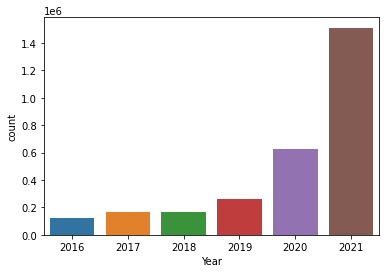

In [ ]:
sns.countplot(x = accidents['Year'])

It appears that the number of accidents has gradually been increasing over time.

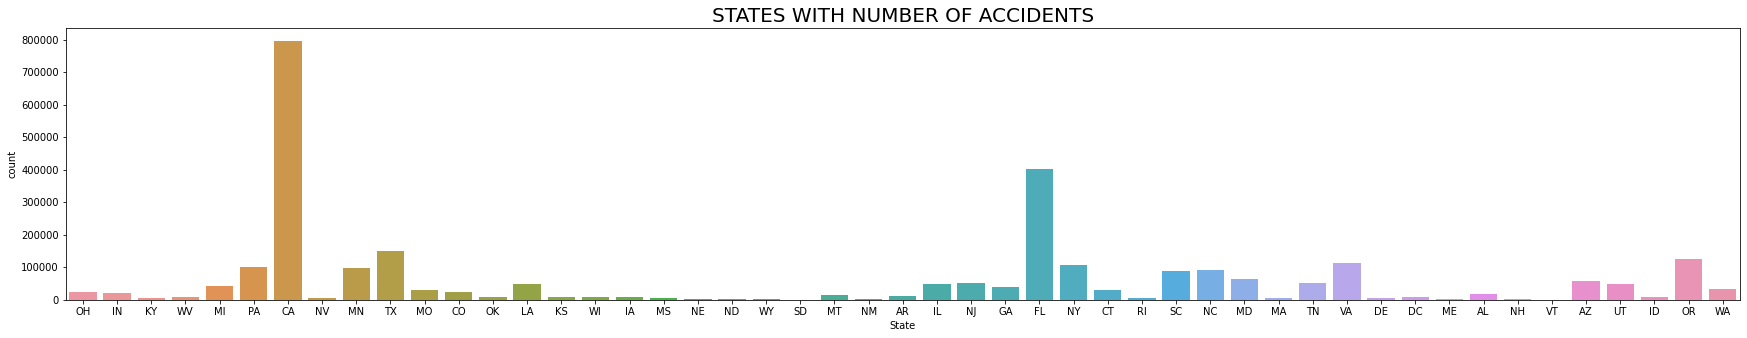

In [ ]:
# Accidents by state:

plt.figure(figsize=(30,5))
sns.countplot(x= accidents["State"],data=accidents)
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

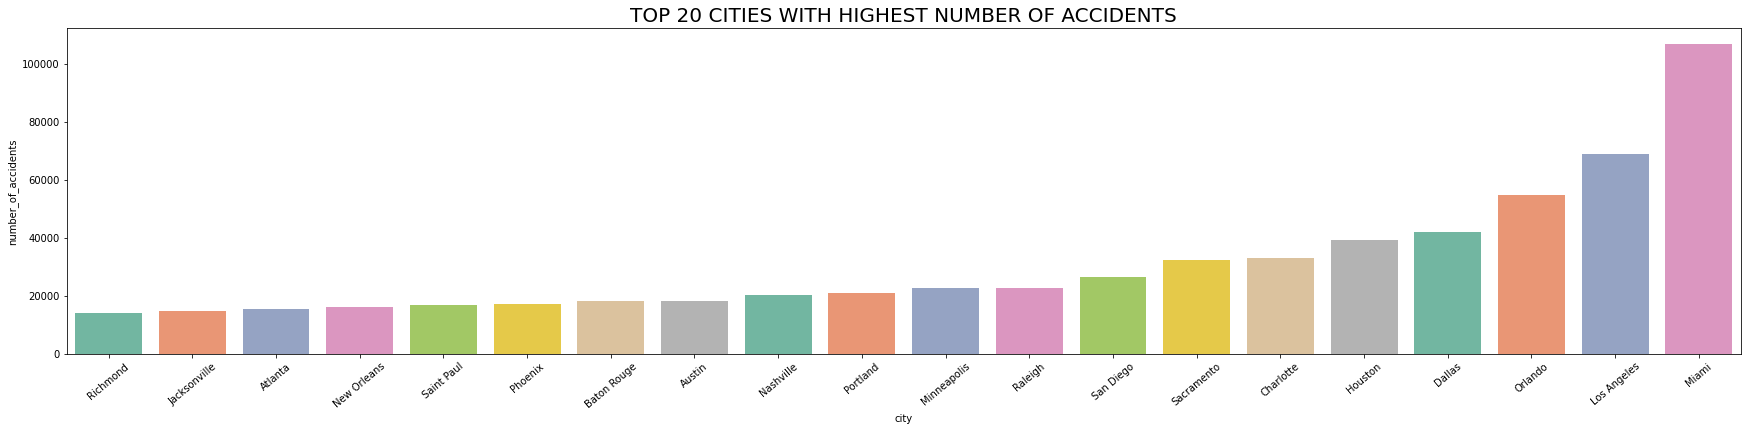

In [ ]:
# top 20 cities in US with most number of accidents:

top_cities=accidents["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(30,6))
sns.barplot(x="city",y="number_of_accidents",data=top_cities , palette='Set2')
plt.title("TOP 20 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

# Data Analysis

Since many factors come into picture, let us categorise them and perform analysis:
* Relationship Analysis
* Impact Analysis
* Location Analysis
* Time Analysis
* Weather Analysis

## Relationship Analysis

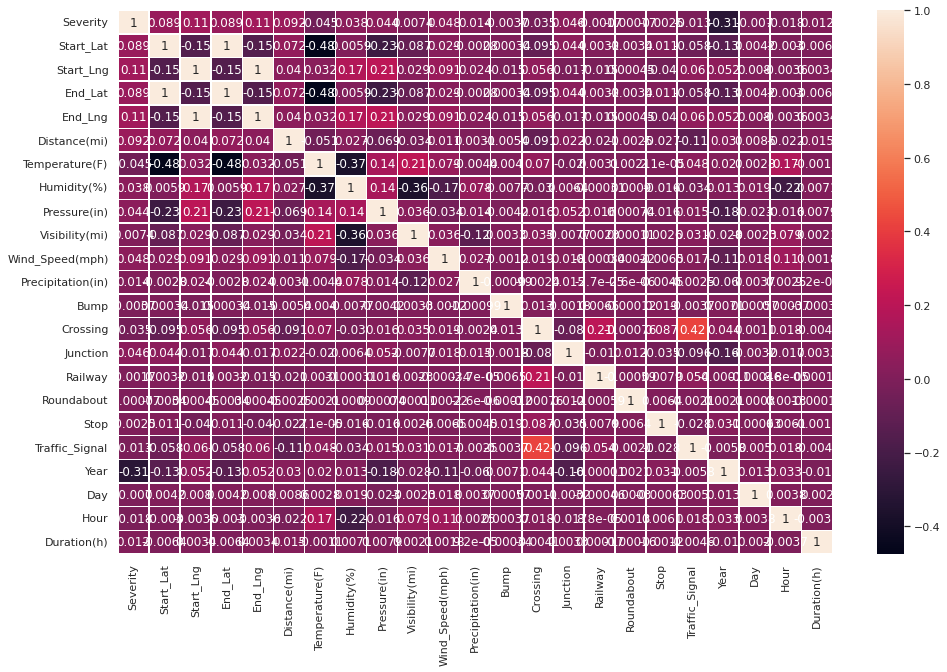

In [ ]:
# Let's find out the correlation between the columns of our dataset

plt.figure(figsize=(16,10))
sns.heatmap(accidents.corr(),annot=True,linewidth=.5)

We dont see much information between the data from the above heatmap, 

In [ ]:
high_corr = accidents.select_dtypes(include = [np.number])
corr = high_corr.corr()
print(corr["Severity"].sort_values(ascending = False)[:10], "\n")

Severity                       1.00
End_Lng                        0.11
Start_Lng                      0.11
Distance(mi)                   0.09
End_Lat                        0.09
Start_Lat                      0.09
Wind_Speed(mph)                0.05
Pressure(in)                   0.04
Humidity(%)                    0.04
Precipitation(in)              0.01
Name: Severity, dtype: float64 



The positive corelaion with respect to severity is as above, with highest povitive corelation with longitudinal datas. 

## Impact Analysis

* Let us try to answer the severity of accidents
* Distance of road affected

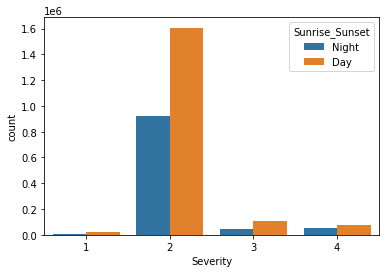

In [ ]:
sns.countplot(x='Severity',data = accidents ,hue='Sunrise_Sunset')

From the above graph we can concude that majority of accidents accour at Day time and the severity of accident is 2 (which is moderate)

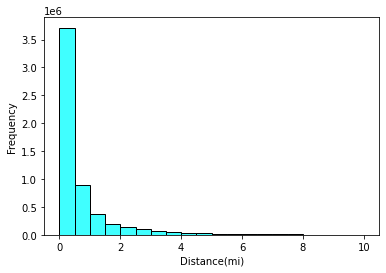

In [ ]:
sns.histplot(data = accidents["Distance(mi)"], stat = "frequency", binrange = (0,10), bins = 20, color = "cyan")

We see that not much of the Road is impacted due to accident, only about 0-4 miles of the road is impacted due to accidents and as the distance increases, the frequency of accidents graadually seem to decrease.

## Location Analysis

* Which places have the most traffic incidents?
* Which states have the least traffic incidents?
* What street type is affected in most cases?
* How are traffic incidents geographically distributed regarding their severity?

Text(0, 0.5, 'No. of cases')

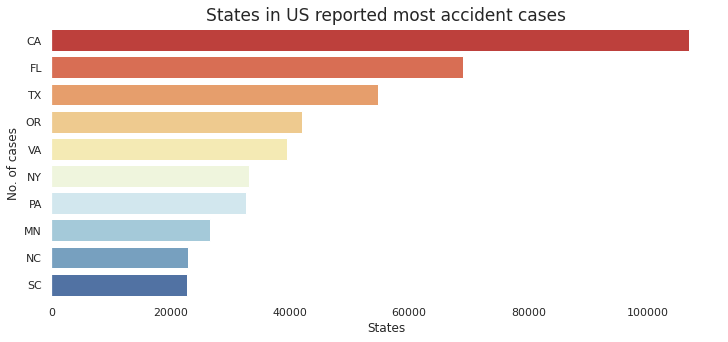

In [ ]:
top_states = accidents["State"].value_counts()[:10]
plt.figure(figsize=(12,5))
sns.barplot(y=top_states.index, x=top_cities, palette = "RdYlBu")
plt.title("States in US reported most accident cases",size=17)
plt.xlabel('States')
plt.ylabel('No. of cases')

Text(0, 0.5, 'No. of cases')

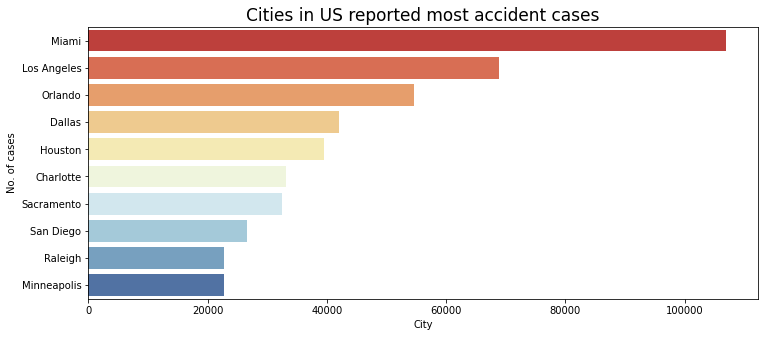

In [ ]:
top_cities = accidents["City"].value_counts()[:10]
plt.figure(figsize=(12,5))
sns.barplot(y=top_cities.index, x=top_cities, palette = "RdYlBu")
plt.title("Cities in US reported most accident cases",size=17)
plt.xlabel('City')
plt.ylabel('No. of cases')

Text(0, 0.5, 'No. of cases')

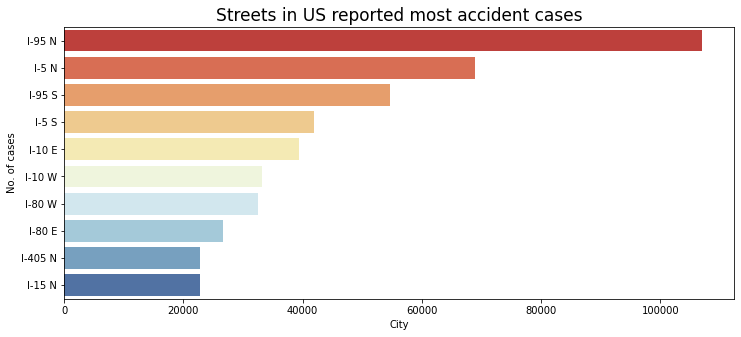

In [ ]:
top_streets = accidents["Street"].value_counts()[:10]
plt.figure(figsize=(12,5))
sns.barplot(y=top_streets.index, x=top_cities, palette = "RdYlBu")
plt.title("Streets in US reported most accident cases",size=17)
plt.xlabel('City')
plt.ylabel('No. of cases')

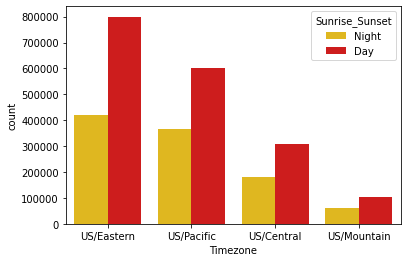

In [ ]:
sns.countplot(data = accidents, x = accidents["Timezone"], hue = accidents["Sunrise_Sunset"], palette = "hot_r")
sns.set(rc={'figure.figsize':(20,5)})

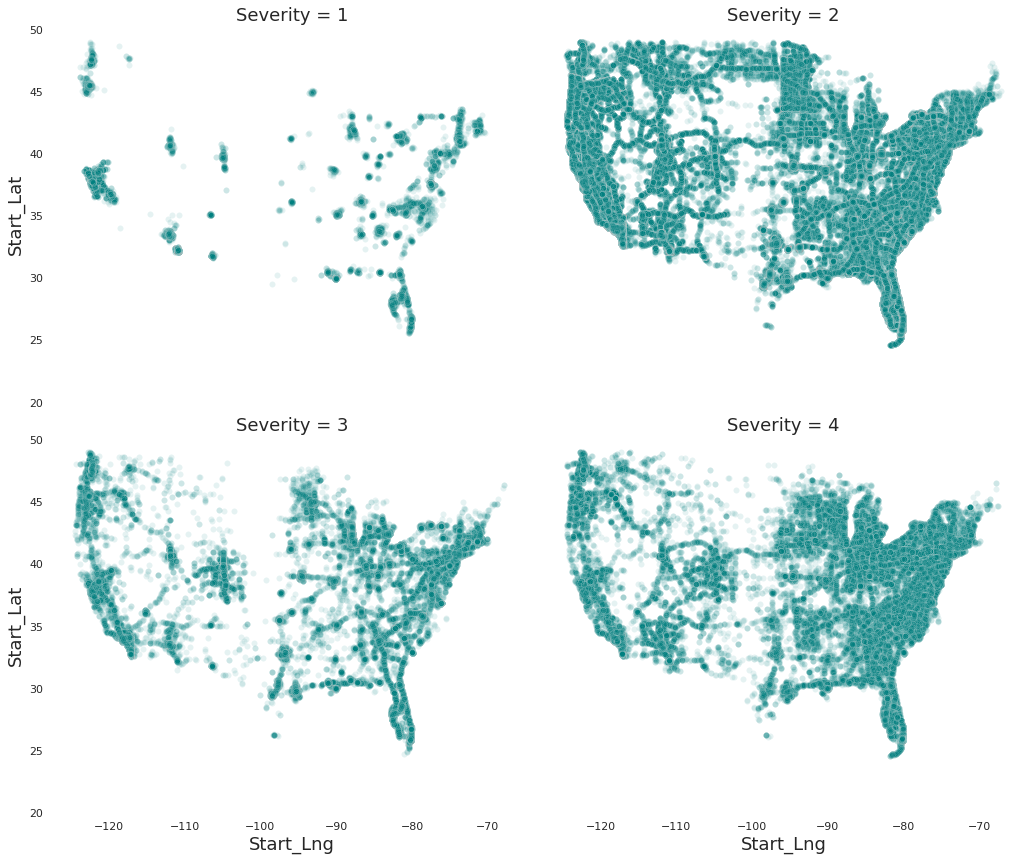

In [ ]:
sns.set(rc = {"figure.figsize": (20,5), "axes.facecolor": "white", "axes.grid": False, "font.family": "Arial",})
scatterplot = sns.relplot(kind="scatter", x="Start_Lng", y="Start_Lat", data=accidents, alpha=0.1, col="Severity", col_wrap=2, height=6, aspect=1.2, color="teal")
plt.ylim(20)
(scatterplot.map(plt.axhline, zorder=0).set_axis_labels("Start_Lng", "Start_Lat", fontsize=18).set_titles(size=18))
plt.show()

In [ ]:
accidents_states = accidents['State'].value_counts().to_frame().reset_index().set_axis(['State', 'Accidents_count'], axis=1)

accidents_states.head(3)

data = dict(
        type = 'choropleth',
        locations = accidents_states['State'],
        locationmode = 'USA-states',
        z = accidents_states['Accidents_count'],
        text = [],
        colorscale = 'hot_r',
        colorbar = {'title' : 'Accidents Count'},
      )

layout = dict(title = 'Accidents Count by States, 2016-2021',
              geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout,skip_invalid=True)
iplot(choromap,validate=False)

## Time Analysis

* At which hour do most of the traffic accidents occur?
* On which day of the week do most traffic accidents occur?
* On which day of the month do most of the traffic accidents occur?
* On which month of the year do most of the accidents occur
* When does the most number of accidents occur (Day or Night)

[Text(0.5, 0, 'Hours')]

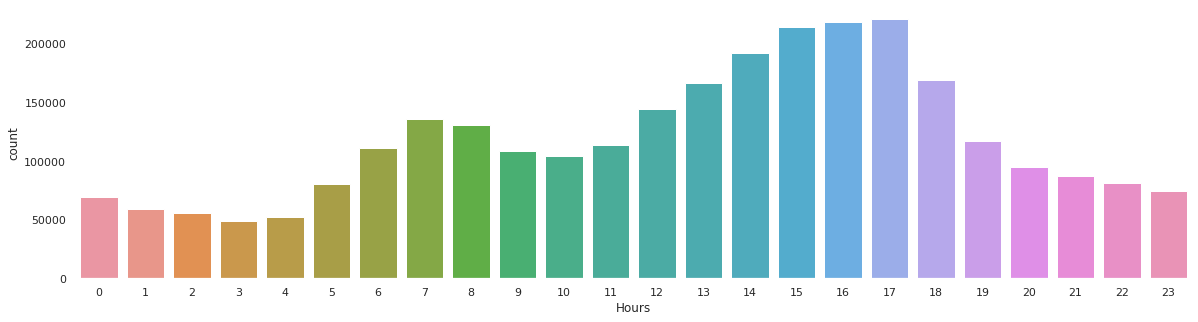

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x = accidents["Hour"]).set(xlabel = "Hours")

* Accidents are less during the time frame from 21:00 to 05:00 in the morning
* The peak time for accidents is in the afternoon from 13:00 to 18:00 in the evening

Text(0.5, 0, 'Weekdays')

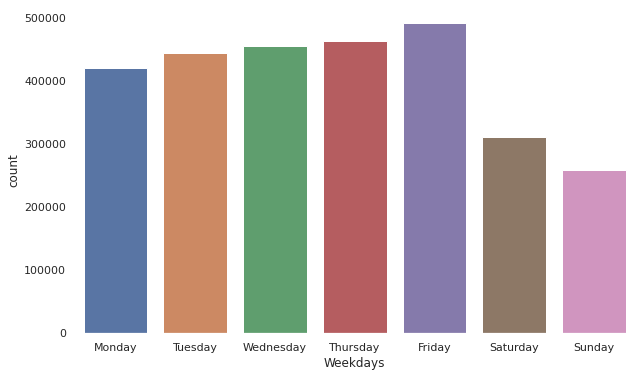

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = accidents["Nameofday"])
plt.xlabel('Weekdays')

* There are fewer accidents during weekends, ie; Saturday, Sunday and evenly distributed in working days.
* Friday has the most number of accidents during the week

[Text(0.5, 0, 'Days')]

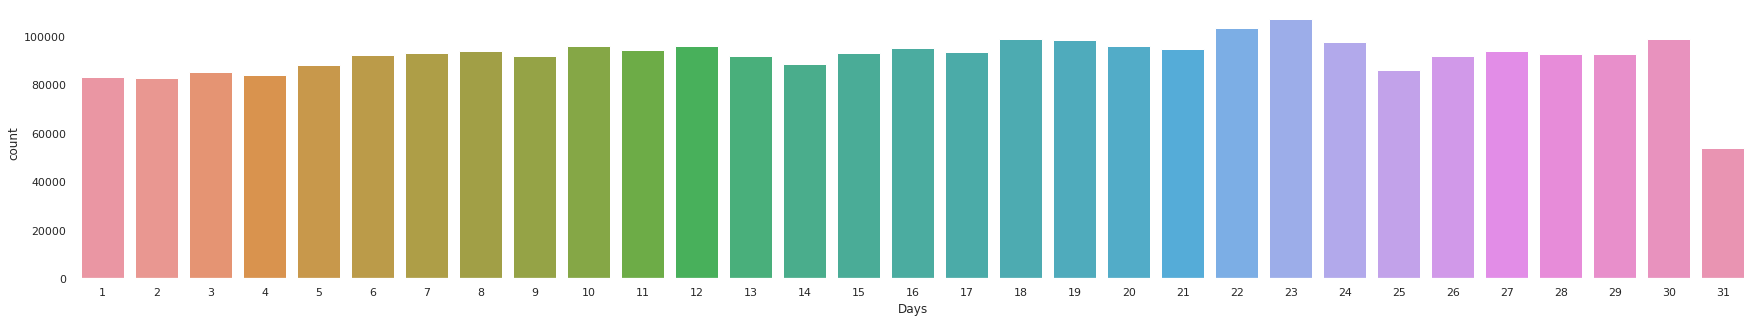

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(x = accidents["Day"]).set(xlabel = "Days")

[Text(0.5, 0, 'Months')]

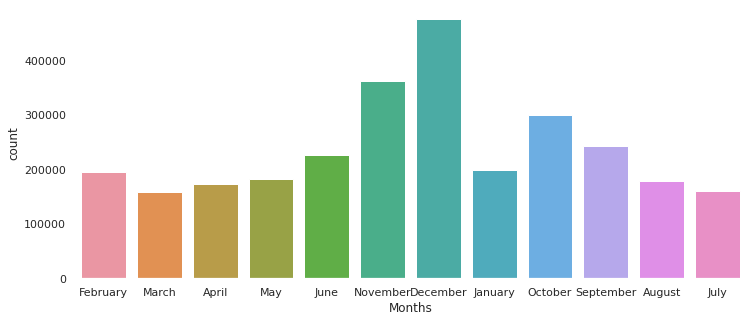

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = accidents["Month"]).set(xlabel = "Months")

* We can see that the months of October through December have the highest number of accidents, which may be related to the winter weather. One explanation could be that the vehicle loses grip on the surface due to the ice that has formed on the roads.
* Accidents gradually decrease January onwards till March.

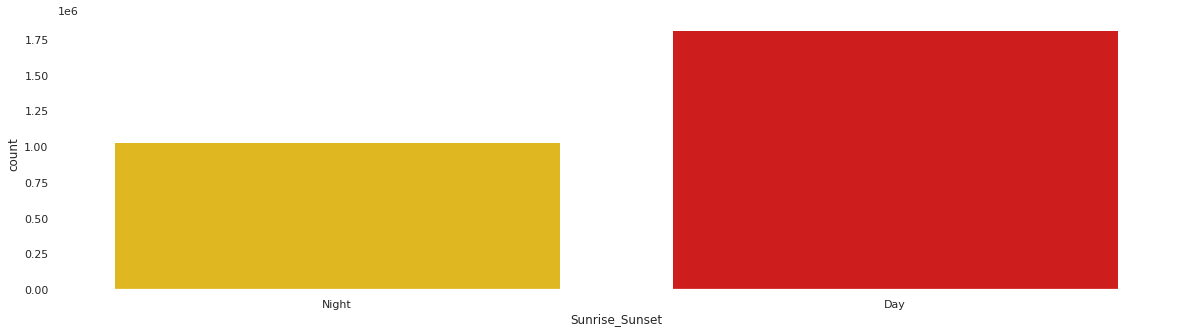

In [ ]:
sns.countplot(x='Sunrise_Sunset',data = accidents, palette = "hot_r")

The largest number of accidents tend to ocur during the day time.

## Weather Analysis

Text(0, 0.5, 'No. of cases')

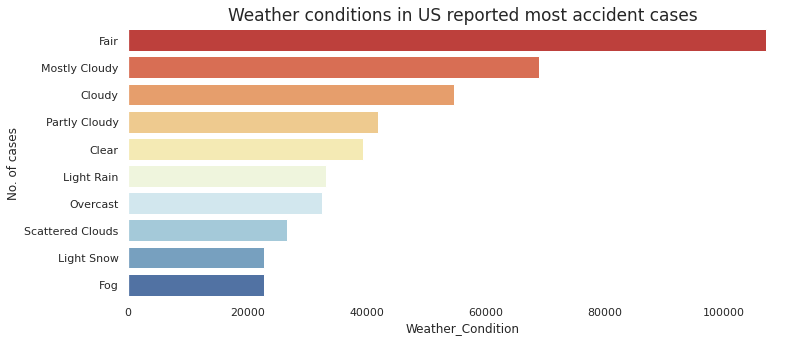

In [ ]:
Weather = accidents["Weather_Condition"].value_counts()[:10]
plt.figure(figsize=(12,5))
sns.barplot(y=Weather.index, x=top_cities, palette = "RdYlBu")
plt.title("Weather conditions in US reported most accident cases",size=17)
plt.xlabel('Weather_Condition')
plt.ylabel('No. of cases')